In [54]:
!pip install kaggle

In [55]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# *1. Importing the dataset from Kaggle*

In [56]:
!kaggle datasets download -d kenjee/z-by-hp-unlocked-challenge-3-signal-processing

z-by-hp-unlocked-challenge-3-signal-processing.zip: Skipping, found more recently modified local copy (use --force to force download)


In [57]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/z-by-hp-unlocked-challenge-3-signal-processing.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [58]:
!ls

'Forest Recordings'	     Parsed_Not_Capuchinbird_Clips
 kaggle.json		     sample_data
 Parsed_Capuchinbird_Clips   z-by-hp-unlocked-challenge-3-signal-processing.zip


# *1.2 Importing the Dependencies*

In [59]:
!pip install tensorflow-io

In [60]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

# *2.Build data loading function*

### *2.1 Defining paths to files*

In [61]:
CAPUCHIN_FILE = os.path.join('data', '/content/Parsed_Capuchinbird_Clips', 'XC216012-13.wav')
NOT_CAPUCHIN_FILE = os.path.join('data', '/content/Parsed_Not_Capuchinbird_Clips', 'Crickets-chirping-9.wav')
CAPUCHIN_FILE

'/content/Parsed_Capuchinbird_Clips/XC216012-13.wav'

In [62]:
NOT_CAPUCHIN_FILE

'/content/Parsed_Not_Capuchinbird_Clips/Crickets-chirping-9.wav'

### *2.2 Building dataloading funnction*

In [63]:
def load_wav_16k_momo(filename):
  # laod encoded wav file
  file_contents = tf.io.read_file(filename)
  # decode wav (tensors by channels)
  wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
  # remove traling axis
  wav = tf.squeeze(wav, axis=-1)
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  # goes from 44100Hz to 16000Hz - ampltude of the audio signal
  wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
  return wav

### *2.3 Plot wave*



In [64]:
wave = load_wav_16k_momo(CAPUCHIN_FILE)
nwave = load_wav_16k_momo(NOT_CAPUCHIN_FILE)

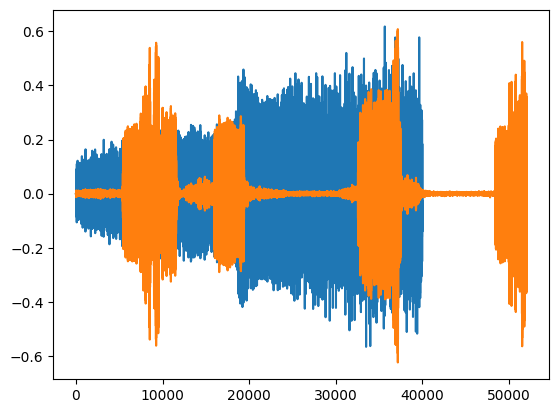

In [65]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# *3. Create Tensorflow dataset*


### *3.1 Define paths to positive and negative data*

In [66]:
POS = os.path.join( '/content/Parsed_Capuchinbird_Clips')
NEG = os.path.join( '/content/Parsed_Not_Capuchinbird_Clips')

In [67]:
POS

'/content/Parsed_Capuchinbird_Clips'

In [68]:
NEG

'/content/Parsed_Not_Capuchinbird_Clips'



### *3.2 Create tensorflow datasets*

In [69]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [70]:
pos.as_numpy_iterator().next()

b'/content/Parsed_Capuchinbird_Clips/XC600460-0.wav'

### *3.3 Add labels and combine positive and negative sample*

In [71]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [72]:
positives.as_numpy_iterator().next()

(b'/content/Parsed_Capuchinbird_Clips/XC16803-1.wav', 1.0)

In [73]:
negatives.as_numpy_iterator().next()

(b'/content/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-20.wav',
 0.0)

In [74]:
data.as_numpy_iterator().next()

(b'/content/Parsed_Capuchinbird_Clips/XC216012-9.wav', 1.0)

In [75]:
data.shuffle(100).as_numpy_iterator().next()

(b'/content/Parsed_Capuchinbird_Clips/XC495697-2.wav', 1.0)

# *4. Detremine average length of capuchin call*

### *4.1 Calculate wave cycle length*

In [76]:
# lenghts = []
# for file in os.listdir(os.path.join('data', '/content/Parsed_Capuchinbird_Clips')):
  # tensor_wave = load_wav_16k_momo(os.path.join('data', '/content/Parsed_Capuchinbird_Clips'))
  # lengths.append(len(tensor_wave))

from pathlib import Path

lengths = []
dir_path = '/content/Parsed_Capuchinbird_Clips'
for file in os.listdir(dir_path):
    file_path = os.path.join(dir_path, file)
    if os.path.isfile(file_path):
        print(f"Processing file: {file_path}")
        tensor_wave = load_wav_16k_momo(file_path)
        print(f"Tensor shape: {tensor_wave.shape}")
        lengths.append(len(tensor_wave))


Processing file: /content/Parsed_Capuchinbird_Clips/XC227471-7.wav
Tensor shape: (40000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC395129-5.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC216012-14.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC114132-6.wav
Tensor shape: (56000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC600460-3.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC216012-5.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC178168-1.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC9221-2.wav
Tensor shape: (56000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC433953-8.wav
Tensor shape: (32000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC600460-1.wav
Tensor shape: (48000,)
Processing file: /content/Parsed_Capuchinbird_Clips/XC520626-3.wav
Tensor shape: (56000,)
Processing 

In [77]:
lengths

[40000,
 48000,
 48000,
 56000,
 48000,
 48000,
 48000,
 56000,
 32000,
 48000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 56000,
 32000,
 56000,
 48000,
 64000,
 56000,
 48000,
 64000,
 56000,
 72000,
 56000,
 40000,
 56000,
 55999,
 48000,
 56000,
 64000,
 56000,
 56000,
 48000,
 32000,
 64000,
 56000,
 56000,
 64000,
 64000,
 40000,
 56000,
 48000,
 64000,
 64000,
 64000,
 55999,
 56000,
 40000,
 56000,
 56000,
 48000,
 64000,
 40000,
 64000,
 40000,
 48000,
 40000,
 56000,
 64000,
 56000,
 48000,
 48000,
 48000,
 48000,
 48000,
 64000,
 56000,
 56000,
 56000,
 72000,
 56000,
 56000,
 56000,
 64000,
 48000,
 64000,
 64000,
 64000,
 32000,
 56000,
 56000,
 64000,
 48000,
 56000,
 40000,
 48000,
 56000,
 56000,
 56000,
 56000,
 56000,
 64000,
 48000,
 48000,
 56000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 56000,
 56000,
 56000,
 64000,
 48000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 64000,
 40000,
 48000,
 64000,
 64000,
 40000,
 40000,
 64000,
 56000,
 64000,


### *4.2 Calculate Mean, Min and Max*

In [78]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [79]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [80]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

# *5 Build preprocessing function to convert to spectrogram*

### *5.1 Build preprocessing function*

In [81]:
def preprocess(file_path, label):
  wav = load_wav_16k_momo(file_path)
  wav = wav[:48000]
  zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
  wav = tf.concat([zero_padding, wav], 0)
  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)
  return spectrogram, label

### *5.2 test out the function and viz the spectogram*

In [82]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [83]:
spectrogram, label = preprocess(filepath, label)

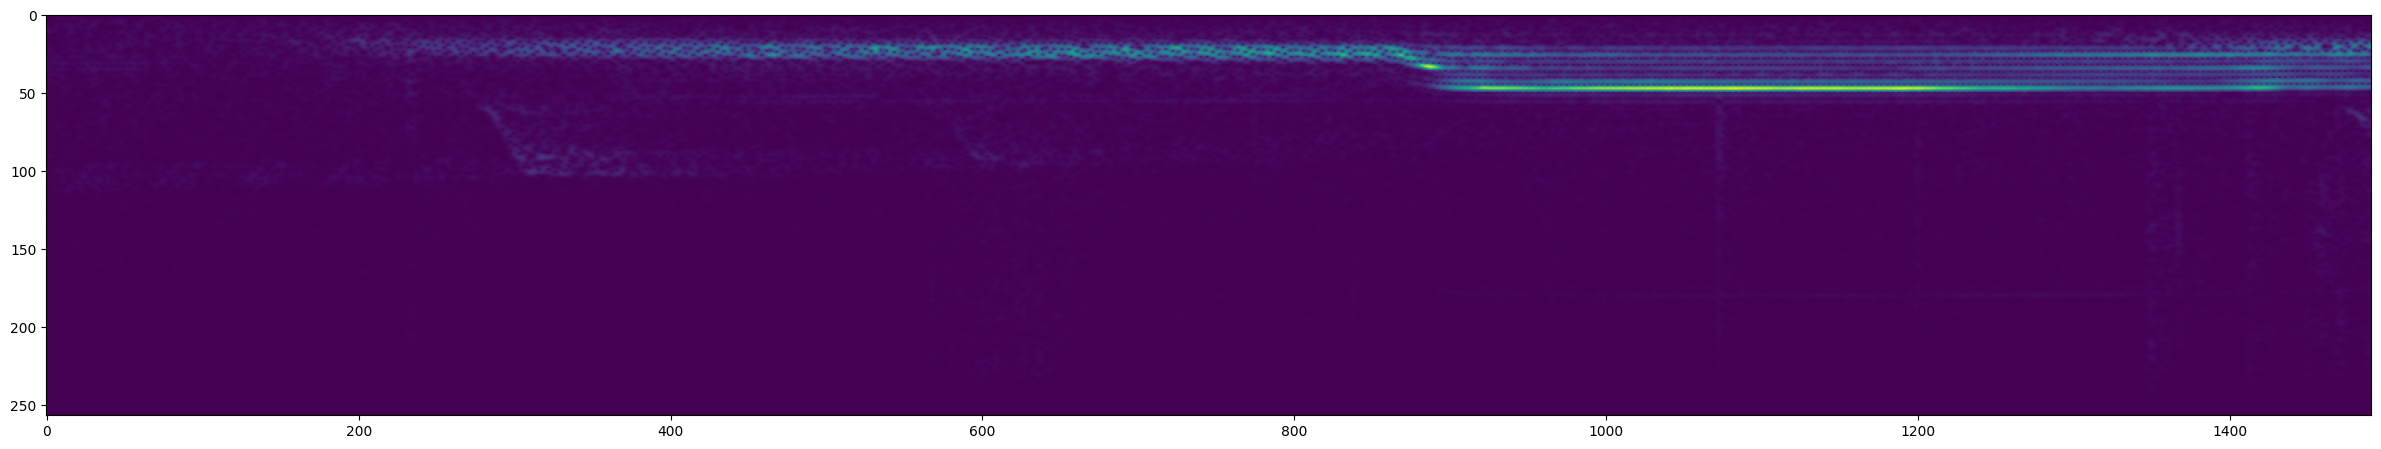

In [84]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

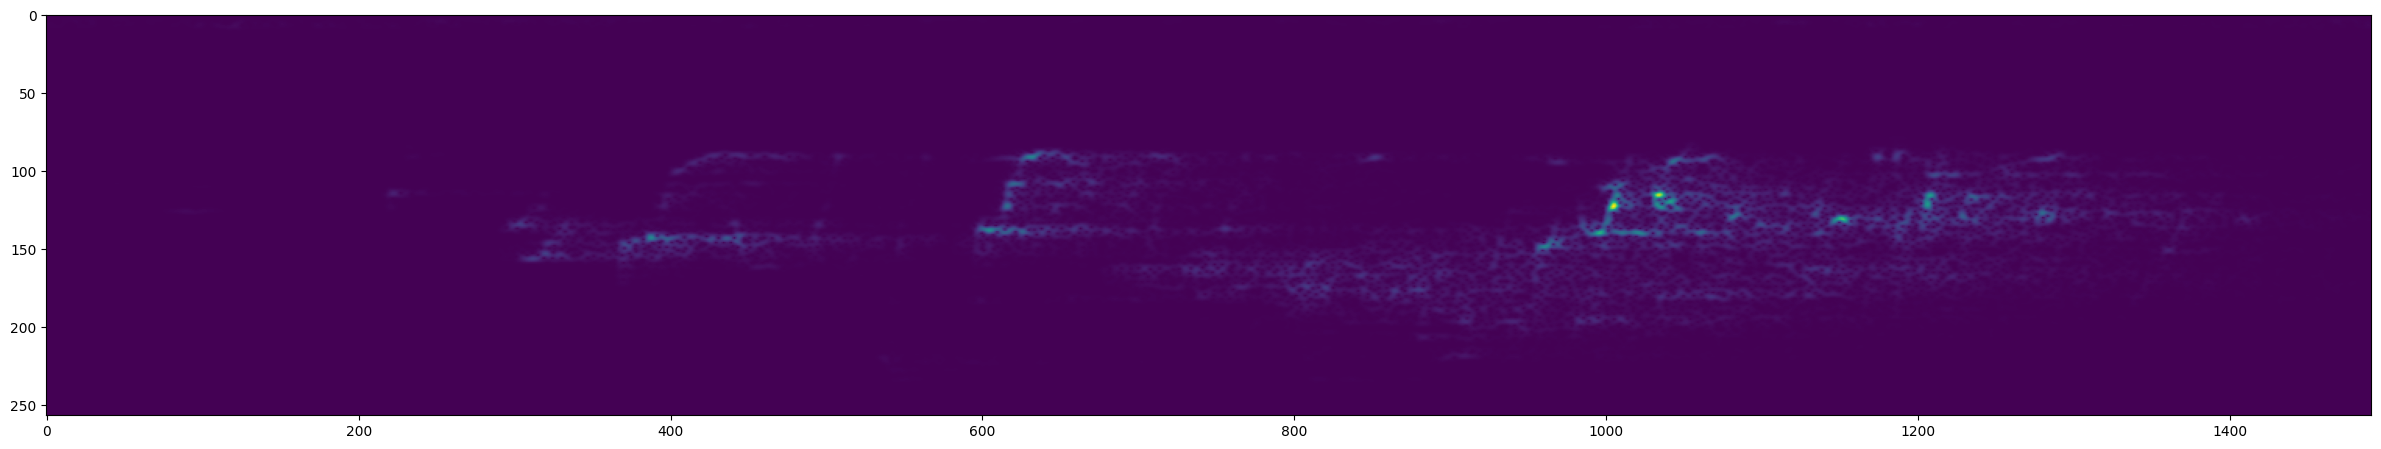

In [85]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# *6. Create training and testing partitions*

### *6.1 Create a tensorflow data pipeline*

In [86]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(2)
data = data.prefetch(8)

### *6.2 Split into training and testing partitions*

In [87]:
len(data)*.7

283.5

In [116]:
train = data.take(36)
test = data.skip(36).take(15)

# *7. Build deep learning model*

### *7.1 Load tensorflow dependencies*

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

### *7.2 Build sequential model, compile and view summary*




In [117]:
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(1491, 257, 1)),
        tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam()
    loss = tf.keras.losses.BinaryCrossentropy()
    metrics = [tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 1489, 255, 8)      80        
                                                                 
 conv2d_7 (Conv2D)           (None, 1487, 253, 8)      584       
                                                                 
 flatten_3 (Flatten)         (None, 3009688)           0         
                                                                 
 dense_6 (Dense)             (None, 64)                192620096 
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 192620825 (734.79 MB)
Trainable params: 192620825 (734.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### *7.3 Fit model, view loss and KPI plots*

In [119]:
history = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
36/36 [==============================] - 2s 62ms/step - loss: 0.0569 - recall_3: 1.0000 - precision_3: 1.0000 - val_loss: 0.0183 - val_recall_3: 1.0000 - val_precision_3: 1.0000
Epoch 2/4
36/36 [==============================] - 2s 68ms/step - loss: 0.0426 - recall_3: 1.0000 - precision_3: 1.0000 - val_loss: 0.0174 - val_recall_3: 1.0000 - val_precision_3: 1.0000
Epoch 3/4
36/36 [==============================] - 2s 59ms/step - loss: 0.0567 - recall_3: 1.0000 - precision_3: 1.0000 - val_loss: 0.0281 - val_recall_3: 1.0000 - val_precision_3: 1.0000
Epoch 4/4
36/36 [==============================] - 2s 59ms/step - loss: 0.0417 - recall_3: 0.9474 - precision_3: 1.0000 - val_loss: 0.0174 - val_recall_3: 1.0000 - val_precision_3: 1.0000


In [120]:
history.history

{'loss': [0.05692501738667488,
  0.042569294571876526,
  0.056651610881090164,
  0.04168548807501793],
 'recall_3': [1.0, 1.0, 1.0, 0.9473684430122375],
 'precision_3': [1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.018308188766241074,
  0.017435291782021523,
  0.028078947216272354,
  0.017376650124788284],
 'val_recall_3': [1.0, 1.0, 1.0, 1.0],
 'val_precision_3': [1.0, 1.0, 1.0, 1.0]}

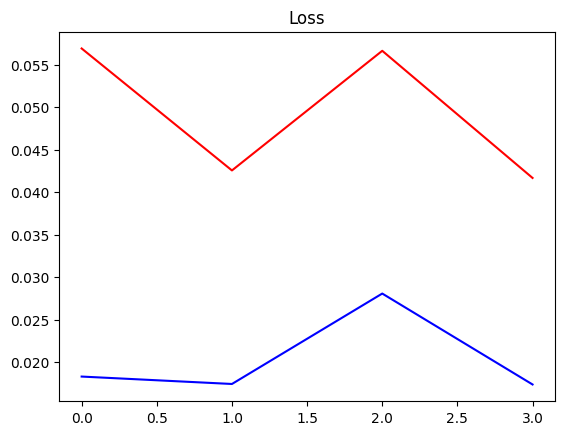

In [121]:
plt.title('Loss')
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.show()

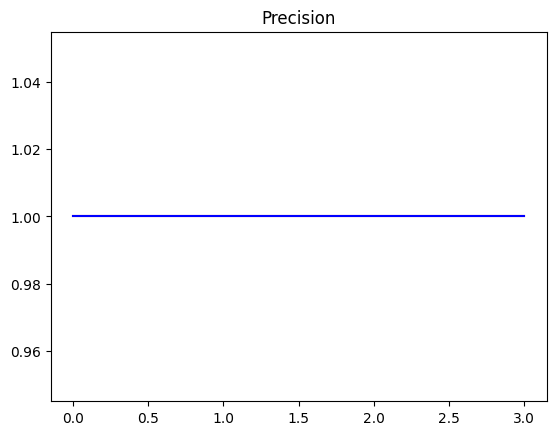

In [122]:
plt.title('Precision')
plt.plot(history.history['precision_3'], 'r')
plt.plot(history.history['val_precision_3'], 'b')
plt.show()

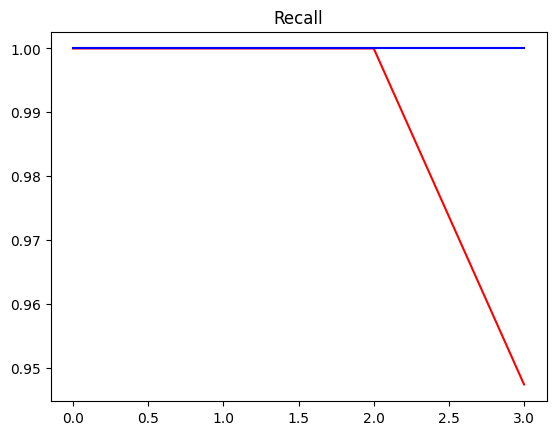

In [123]:
plt.title('Recall')
plt.plot(history.history['recall_3'], 'r')
plt.plot(history.history['val_recall_3'], 'b')
plt.show()

# *8. Make a prediction on a signale clip*

### *8.1 Get one batch and make a prediction*

In [124]:
X_test, y_test = test.as_numpy_iterator().next()

In [125]:
X_test.shape

(2, 1491, 257, 1)

In [126]:
y_test.shape

(2,)

In [127]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 154ms/step


In [128]:
yhat

array([[1.0217787e-16],
       [0.0000000e+00]], dtype=float32)

### *8.2 Convert logits to classes*

In [129]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [134]:
yhat

[0, 0]

In [136]:
y_test.astype(int)

array([0, 0])

In [131]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [133]:
tf.math.reduce_sum(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>